Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years,
Administration -- spend on administration in the past few years,
Marketing Spend -- spend on Marketing in the past few years,
State -- states from which data is collected,
Profit  -- profit of each state in the past few years.


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm


In [5]:
# Reading a Data Of 50 Startups
dataset = pd.read_csv("/content/50_Startups.csv")
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


**EDA**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
dataset.isna().sum()  # Checking for Null Values In Dataset

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
#Finding A correlation Matrix of data
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#Checking for duplicated Data in dataset

In [10]:
dataset[dataset.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [57]:
# Renaming the coloums names
dataset=dataset.rename({'R&D Spend':'RD','Administration':'AD','Marketing Spend':'MS'},axis=1)
dataset

,RD,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [12]:
dataset.describe()

,RD,AD,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Scatterplot between variables along with histograms

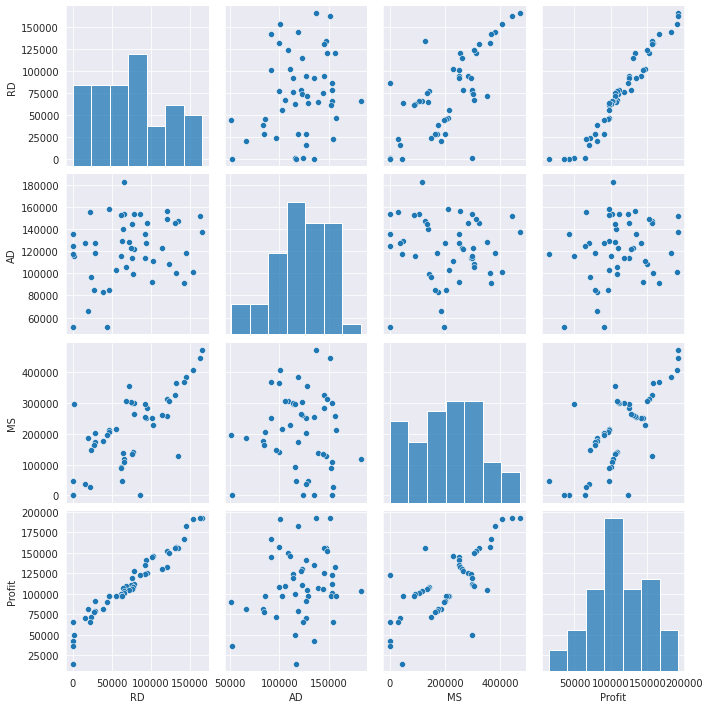

In [13]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(dataset)

#Preparing a Model

In [15]:
#Buildin a model
import statsmodels.formula.api as smf 
model=smf.ols("Profit~RD+AD+MS",data=dataset).fit()

In [16]:
#Coefficients
model.params

Intercept    50122.192990
RD               0.805715
AD              -0.026816
MS               0.027228
dtype: float64

In [17]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RD           17.846374
AD           -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
AD           6.017551e-01
MS           1.047168e-01
dtype: float64


In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

#Simple Linear Regression Models

In [25]:
ml_AD=smf.ols('Profit~AD',data = dataset).fit()  
#t and p-Values
print(ml_AD.tvalues, '\n', ml_AD.pvalues) 

Intercept    3.040044
AD           1.419493
dtype: float64 
 Intercept    0.003824
AD           0.162217
dtype: float64


In [22]:
ml_MS=smf.ols('Profit~MS',data = dataset).fit()  
#t and p-Values
print(ml_MS.tvalues, '\n', ml_MS.pvalues) 

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [26]:
ml_ADMS=smf.ols('Profit~AD+MS',data = dataset).fit()  
print(ml_ADMS.tvalues, '\n', ml_ADMS.pvalues)  

Intercept    1.142741
AD           2.467779
MS           8.281039
dtype: float64 
 Intercept    2.589341e-01
AD           1.729198e-02
MS           9.727245e-11
dtype: float64


#Calculating Model Validation

In [27]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_r=smf.ols("RD~AD+MS",data=dataset).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("AD~RD+MS",data=dataset).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MS~RD+AD",data=dataset).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RD','AD','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RD,2.468903
1,AD,1.175091
2,MS,2.326773


In [ ]:
#None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

# Residual Analysis

#Test for Normality of Residuals (Q-Q Plot)

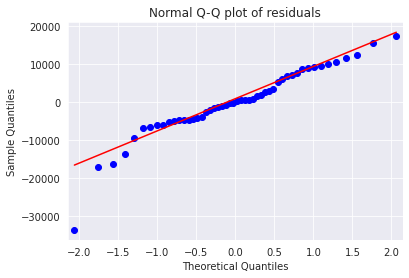

In [31]:
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [35]:
list(np.where(model.resid>3000))

[array([ 2,  3, 10, 11, 12, 13, 16, 19, 25, 34, 35, 36, 38, 40, 43, 45])]

## Residual Plot for Homoscedasticity

In [36]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

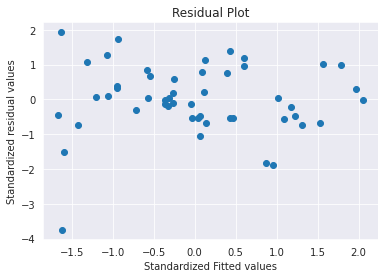

In [37]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

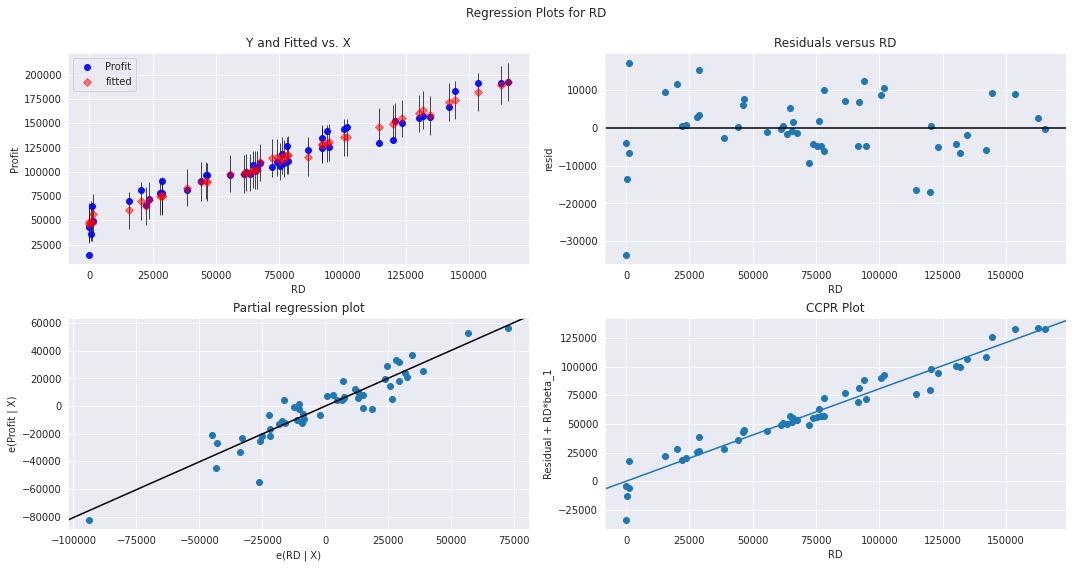

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

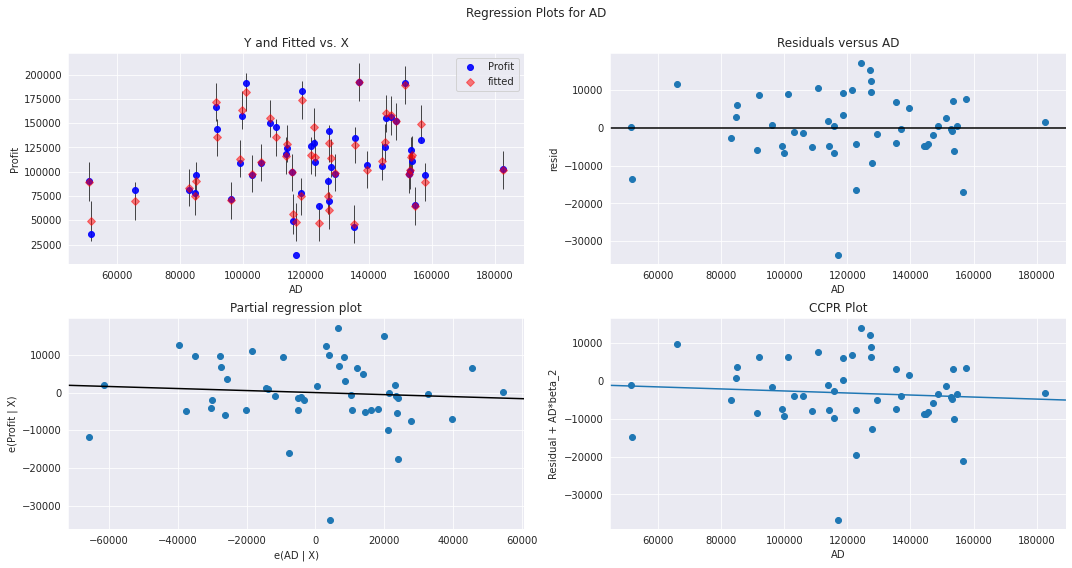

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "AD", fig=fig)
plt.show()

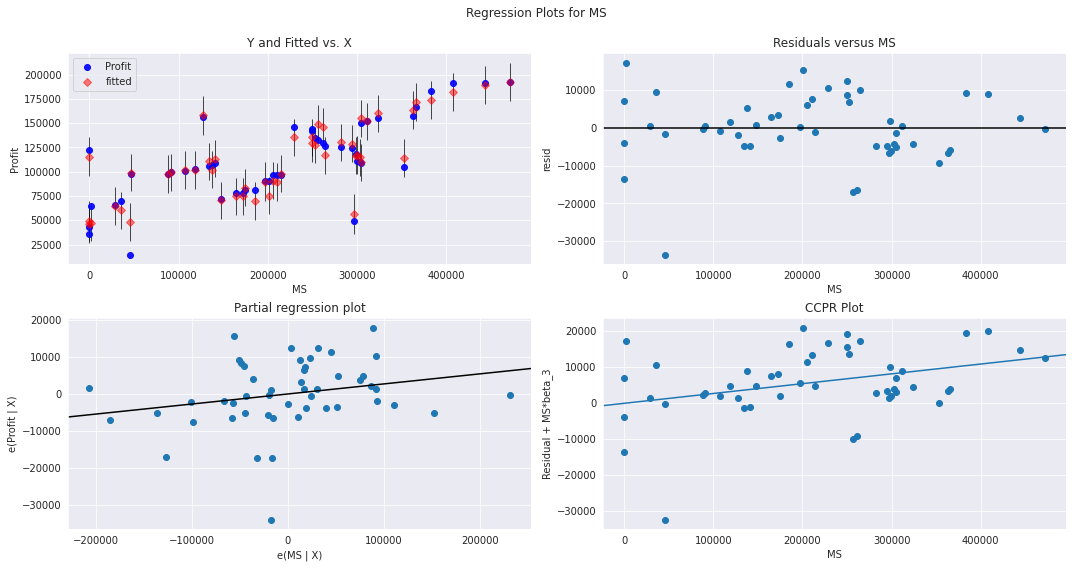

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

#Model Deletion Diagnostics (checking Outliers or Influencers)
Two Techniques : 1. Cook's Distance & 2. Leverage value

In [41]:
#Cook Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


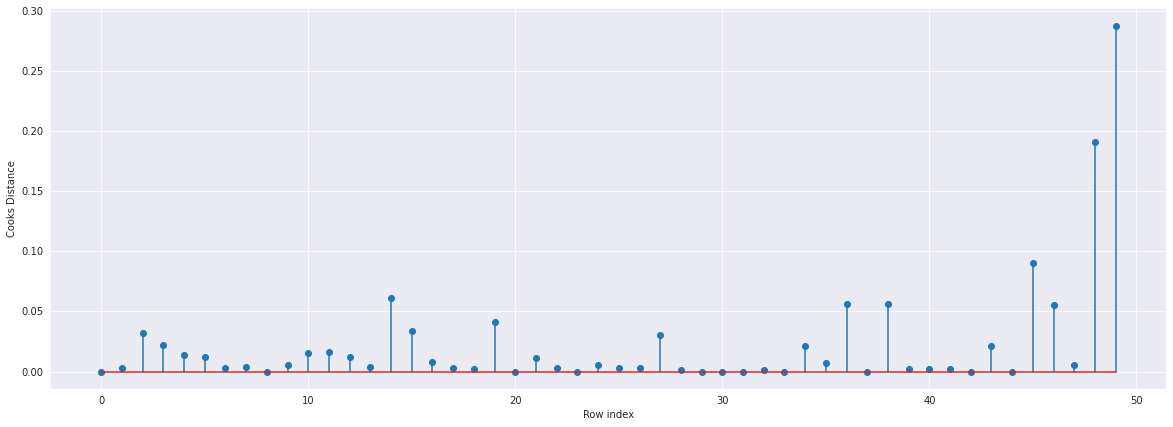

In [43]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dataset)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)


## High Influence points
2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

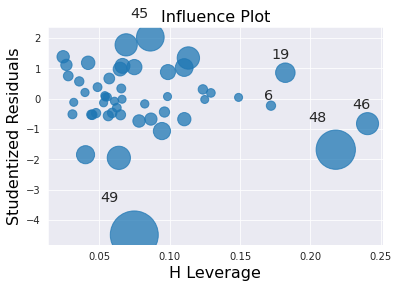

In [46]:
influence_plot(model) 
plt.show()

In [47]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=dataset.shape[1]
n=dataset.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [48]:
dataset[dataset.index.isin([48,49])] # Influencer Point is 49 & 48

,RD,AD,MS,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# Improving the model

# Build Model

In [61]:
#Exclude variable "WT" and generate R-Squared and AIC values
model2= smf.ols('Profit~RD+AD+MS',data = dataset).fit()

In [62]:
(model2.rsquared,model2.aic)

(0.9507459940683246, 1058.7714985998055)

In [63]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RD+AD+MS",data=dataset).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataset=dataset.drop(dataset.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataset
    else:
        final_model=smf.ols("Profit~RD+AD+MS",data=dataset).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129848
Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improve

#Model Predictions


In [64]:
# say New data for prediction is
new_data=pd.DataFrame({'RD':70000,"AD":90000,"MS":140000},index=[0])
new_data

,RD,AD,MS
0,70000,90000,140000


In [65]:
# Manual Prediction of Price
final_model.predict(new_data)

0    104858.729408
dtype: float64

In [67]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(dataset)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

#table containing R^2 value for each prepared model

In [68]:
data={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(data)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
